<a href="https://colab.research.google.com/github/greyart93/astar_rbfs_algo/blob/main/dtc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import requests
from io import StringIO


In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
# from dtreeviz import *
import dtreeviz

In [ ]:
# Load dataset
url = "https://gist.githubusercontent.com/greyart93/bb3dd1d009a87412d7219b0952669e1a/raw/05983ebaad0b3de1fbb0f431047f37a5a76097ac/play_tennis.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df = pd.read_csv(data)


In [ ]:
df

,outlook,humidity,windy,play
0,overcast,high,False,yes
1,overcast,normal,True,yes
2,overcast,high,True,yes
3,overcast,normal,False,yes
4,rainy,high,False,yes
5,rainy,normal,False,yes
6,rainy,normal,True,no
7,rainy,normal,False,yes
8,rainy,high,True,no
9,sunny,high,False,no


In [ ]:
# Preprocess data
df['outlook'] = df['outlook'].map({'sunny': 0, 'overcast': 1, 'rainy': 2})
df['humidity'] = df['humidity'].map({'high': 0, 'normal': 1})
df['windy'] = df['windy'].map({False: 0, True: 1})
df['play'] = df['play'].map({'no': 0, 'yes': 1})

X = df[['outlook', 'humidity', 'windy']]
y = df['play']


In [ ]:
df

,outlook,humidity,windy,play
0,1,0,0,1
1,1,1,1,1
2,1,0,1,1
3,1,1,0,1
4,2,0,0,1
5,2,1,0,1
6,2,1,1,0
7,2,1,0,1
8,2,0,1,0
9,0,0,0,0


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y)


In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.predict([[1,0,0]])

array([1])

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Display the predictions and evaluate the model
print("Predictions on the test set:", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Predictions on the test set: [1 1 1 1]
Accuracy: 0.5
Confusion Matrix:
 [[0 2]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
# New sample data (outlook, humidity, windy)
new_samples = pd.DataFrame({
    'outlook': [0, 1],  # sunny and overcast
    'humidity': [1, 0], # normal and high
    'windy': [0, 1]     # False and True
})

# Make predictions for new samples
new_predictions = clf.predict(new_samples)

# Display new predictions
print("Predictions for new samples:", new_predictions)

Predictions for new samples: [1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


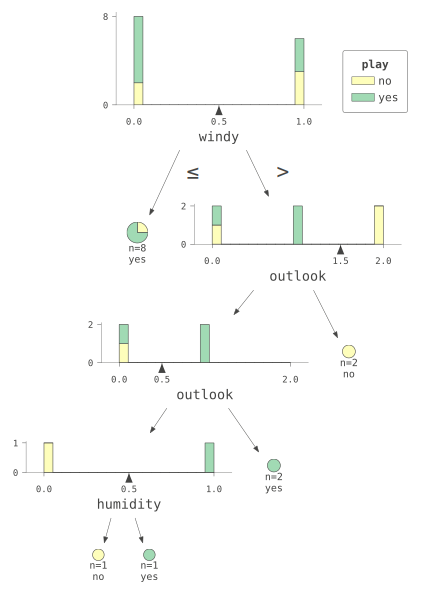

In [ ]:
# Visualize the decision tree
viz = dtreeviz.model(clf,
                      X,
                      y,
                      target_name="play",
                      feature_names=X.columns,
                      class_names=["no", "yes"])

viz.view(scale=1.5, fontname="monospace")